# CIFAR-100 DATA VISUALISATION

In this notebook we will take a look at the data we are using. We will focus on the following questions:
- How our data look like?
- What distribution does this data undergo?
- Analytics of the tabular representation of our data.
- Normalization and Standartization processes
- Sketching analytical graphs.

## Analitics of normalized and augmented data

Loading the train and test loaders in order to perform analysis on the normalized and augmented data along with the necessary modules for its visualization.

In [20]:
import torch

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

from data_cifar_100 import train_loader, train_set, test_loader, validation_set

Printing the appropriate sizes of training sets:

In [21]:
print(f"The size of training set is {len(train_set)} samples")
print(f"The size of validation set is {len(validation_set)} samples")

The size of training set is 45000 samples
The size of validation set is 5000 samples


Splitting the training dataset into features and targets (labels) for further analytics of the raw data :

In [22]:
train_data = train_set.dataset.data
train_labels = train_set.dataset.targets

In [24]:
train_data.shape

(50000, 32, 32, 3)

Collecting first 1000 images from the train loader. Tranformations are applied on them(e.g., normalization/standartization/horizont flips):

In [4]:
small_batch_images = []
small_batch_labels = []

count = 0
for images, labels in train_loader:
    small_batch_images.append(images)
    small_batch_labels.append(labels)
    
    count += images.size(0)
    if count >= 1000: 
        break

X_sample = torch.cat(small_batch_images)[:1000]
y_sample = torch.cat(small_batch_labels)[:]

red_pixels   = X_sample[:, 0, :, :]
green_pixels = X_sample[:, 1, :, :]
blue_pixels  = X_sample[:, 2, :, :]

red_image   = red_pixels.cpu().numpy().flatten()
green_image = green_pixels.cpu().numpy().flatten()
blue_image  = blue_pixels.cpu().numpy().flatten()

>Comparison between images from **training dataset** and **training loader**

In the following table we can observe the main difference in resolutions and smoothness of the images. As it can be seen , in the first row we represent the images from Training Dataset (on this instances we did not apply augumentation such as horizontal flip, or rescaling, moreover the resolution on this images is low, so the sharp edges are visible), in the second row there are images from train loader (to those images we applied rescaling and normalization/standartization functions).

In [50]:
labels = train_loader.dataset.dataset.classes

label_dict = {i: name for i, name in enumerate(labels)}


In [51]:
train_example_ind = train_labels[:5]
x_sample_ind = y_sample[:5]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.053115898461357e-09..1.0000000236034394].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.053115898461357e-09..0.9294117388725281].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.053115898461357e-09..1.0000000236034394].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.053115898461357e-09..0.9999999964237213].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.053115898461357e-09..1.0000000076293944].


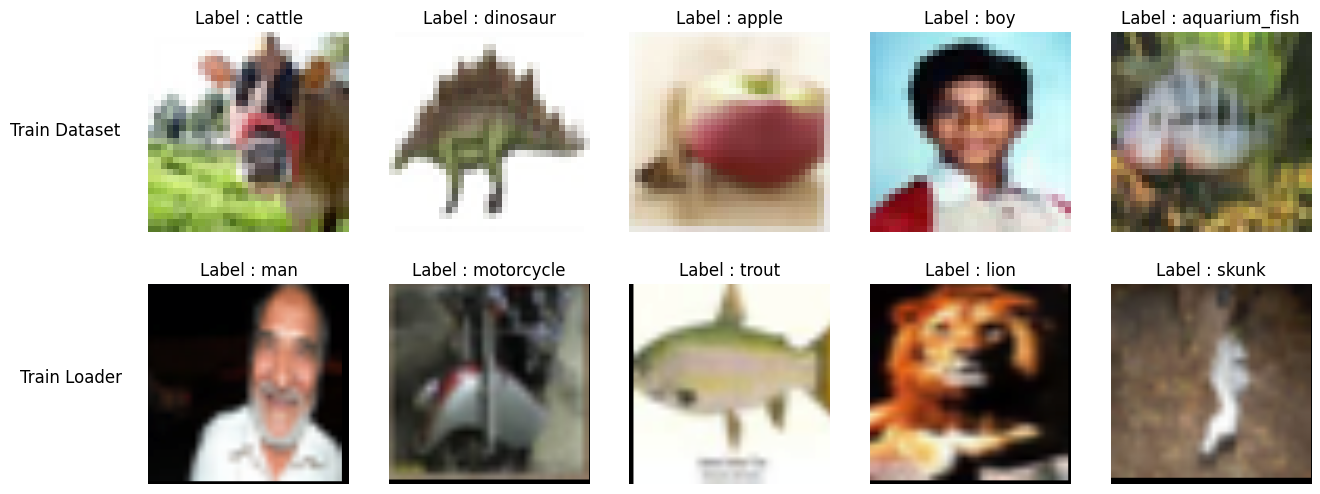

In [54]:
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
fig, ax = plt.subplots(2, 5, figsize=(15, 6))
plt.axis("off")
raw_examples = train_data[:5,:,:,:]
for i in range(5) :
  img_raw = raw_examples[i]
  ax[0,i].imshow(img_raw )
  ax[0,i].set_title(f"Label : {label_dict[train_example_ind[i]]}")
  ax[0, i].axis("off")

  img = X_sample[i].permute(1, 2, 0).numpy()
  img = (std * (img) + mean) 
  ax[1,i].imshow(img)
  ax[1,i].set_title(f"Label : {label_dict[x_sample_ind[i].item()]}")
  ax[1,i].axis("off")
  if i == 0:
        ax[0, i].text(-5, 16, "Train Dataset", fontsize=12, ha='right')
        ax[1, i].text(-30, 110, "Train Loader", ha='right', fontsize=12)

plt.show()


Pixels distribution on the original images from `train_dataset` vs 1000 images from `train_loader`

In [55]:
red = train_data[:,:,:,0].flatten()
green = train_data[:,:,:,1].flatten()
blue = train_data[:,:,:,2].flatten()

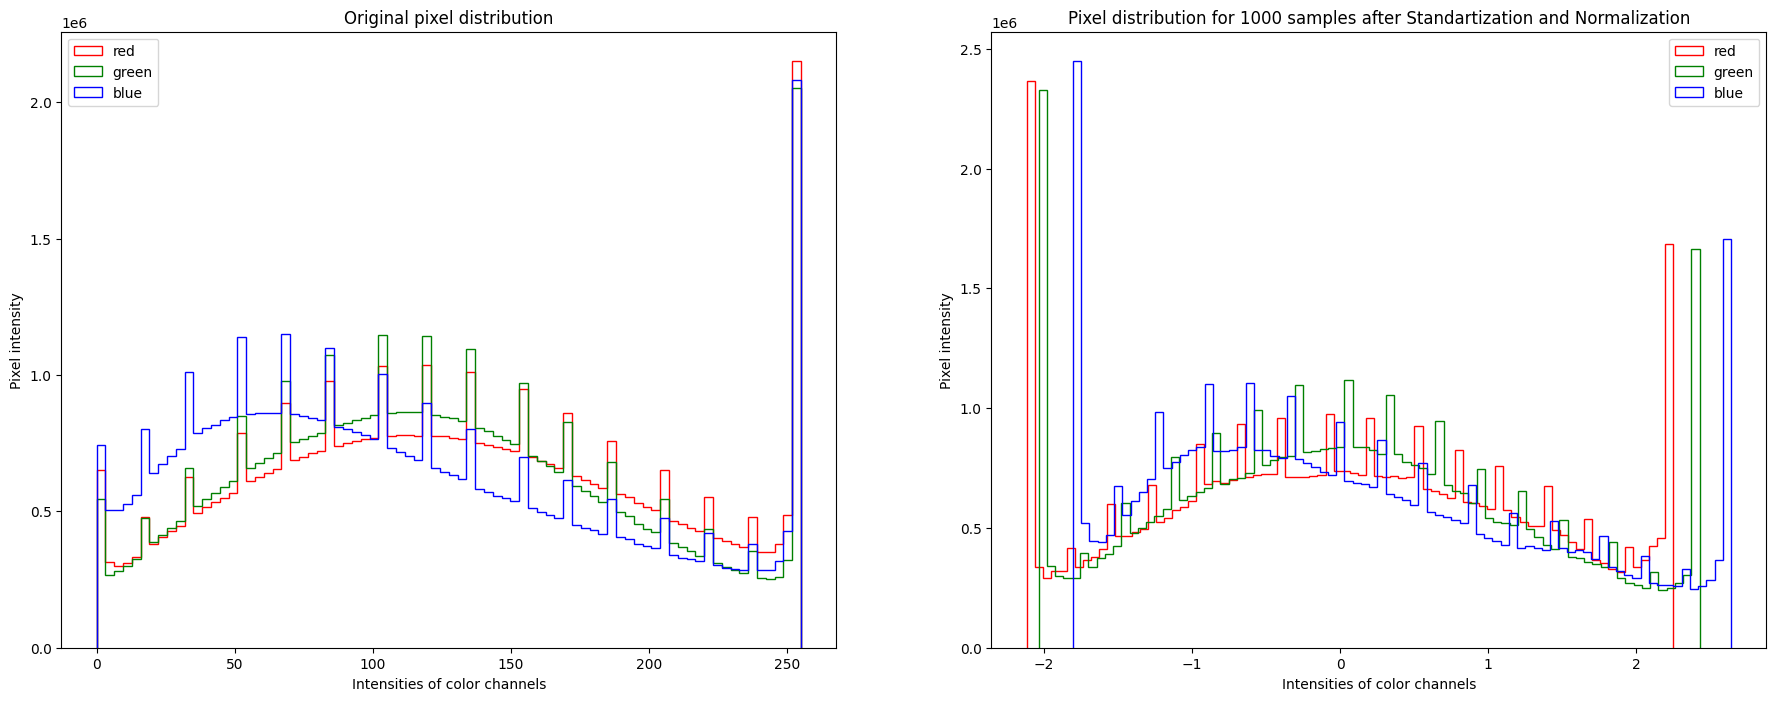

In [56]:
plt.figure(figsize=(22,8))
plt.subplot(1,2,1)
plt.hist(red, bins=80,histtype="step",color="red",label="red")
plt.hist(green, bins=80,histtype="step",color="green",label="green")
plt.hist(blue, bins=80,histtype="step",color="blue",label="blue")
plt.xlabel("Intensities of color channels")
plt.title("Original pixel distribution")
plt.legend()
plt.ylabel("Pixel intensity")
plt.subplot(1,2,2)
plt.hist(red_image, bins=80,histtype="step",color="red",label="red")
plt.hist(green_image, bins=80,histtype="step",color="green",label="green")
plt.hist(blue_image, bins=80,histtype="step",color="blue",label="blue")
plt.legend()
plt.xlabel("Intensities of color channels")
plt.ylabel("Pixel intensity")
plt.title("Pixel distribution for 1000 samples after Standartization and Normalization")
plt.show()


# **Left Graph**
<br>

>Raw Distribution : "Original pixel distribution" illustrates the pixel intensities in their native format (0–255). The histogram reflects the natural dynamic range of the source imagery.

>Intensity Imbalance: The Blue channel (blue line) is heavily skewed toward the left, showing a much higher density of low-intensity pixels ($0$ to $75$). This indicates the dataset is dominated by a dark tones or shadows.Moreover, the Red and Green channels are shifted further right, peaking near the center ($\approx 120$). This suggests that the brightness and warmth of the images are primarily driven by these two channels.

<br>

# **Right Graph**

>Normalized Distribution : The "Standardized pixel distribution". The pixel values have been rescaled to center around a mean of 0 with a standard deviation of 1, shifting the range to approximately $[-2, 2.5]$. Even after normalization, the Blue channel retains its distinct shape — peaking slightly lower than 0 , while Red and Green remain closely grouped. This ensures the model recognizes the relative color differences without being distracted by the absolute brightness of the original file.

Bar chart for mean values for each color on images from the raw dataset:

In [11]:
mean = train_data.mean(axis=(0, 1, 2)) 
std = train_data.std(axis=(0, 1, 2)) 

In [12]:
red_mean = mean[0]
blue_mean = mean[2]
green_mean = mean[1]

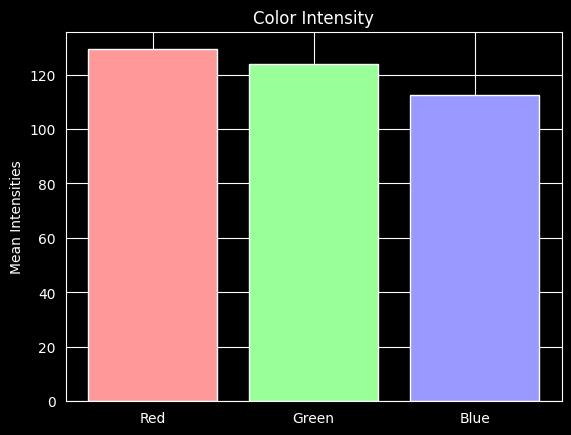

In [13]:
plt.bar( x=["Red","Green", "Blue"],height=[red_mean,green_mean,blue_mean], color=["#ff9999", "#99ff99", "#9999ff"])

plt.xticks()
plt.ylabel("Mean Intensities")
plt.title("Color Intensity")
plt.show()

## Tabular representation of our data

We are reshaping train data, because DataFrame expects 2-dim input:

In [14]:
train_d_reshaped = torch.from_numpy(train_data).reshape(50000,-1)


In [15]:
train_data = pd.DataFrame(train_d_reshaped)
train_targest = pd.DataFrame(train_labels, columns=["Lables"])

In [16]:
train_targest.head()

,Lables
0,19
1,29
2,0
3,11
4,1


Label distribution on the original training dataset:

In [112]:
target_values = train_targest.value_counts()

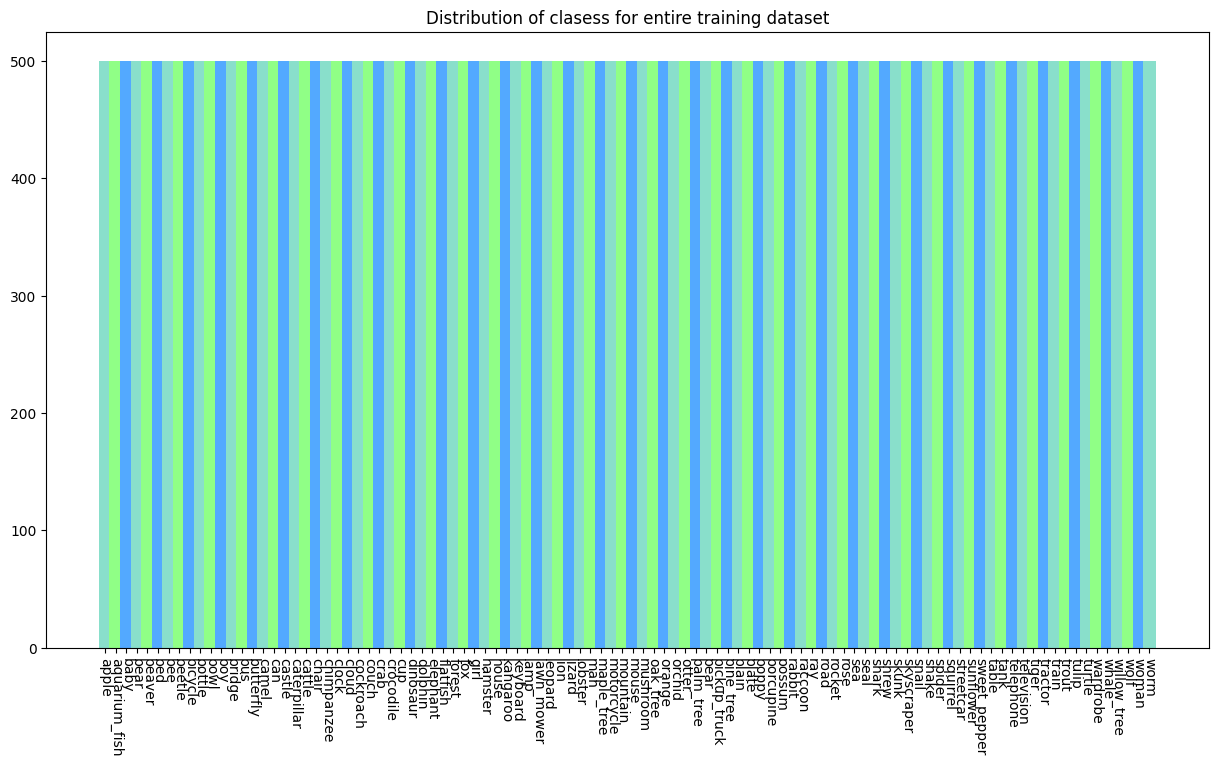

In [145]:
plt.figure(figsize=(15,8))
plt.bar(x=labels, height=target_values,color=["#89dfcb","#90ff86", "#53a9ff"],width=1.2)
plt.title("Distribution of clasess for entire training dataset")
plt.xticks(rotation=-90)
plt.show()

Label distribution in the train_loader:

1. We take indices of the instances in train_set, which correspond to the instances in the original train_dataset.
2. Using list comprehension, we will store the appropriate labels of the desired instances.
3. We count how many times each label occurs in our list.

In [58]:
train_indices = train_set.indices
train_labels_raw = [train_labels[i] for i in train_indices]
counts = [train_labels_raw.count(i) for i in range(100)]

In [59]:
train_dict = {x:y for x,y in zip(labels,counts) }

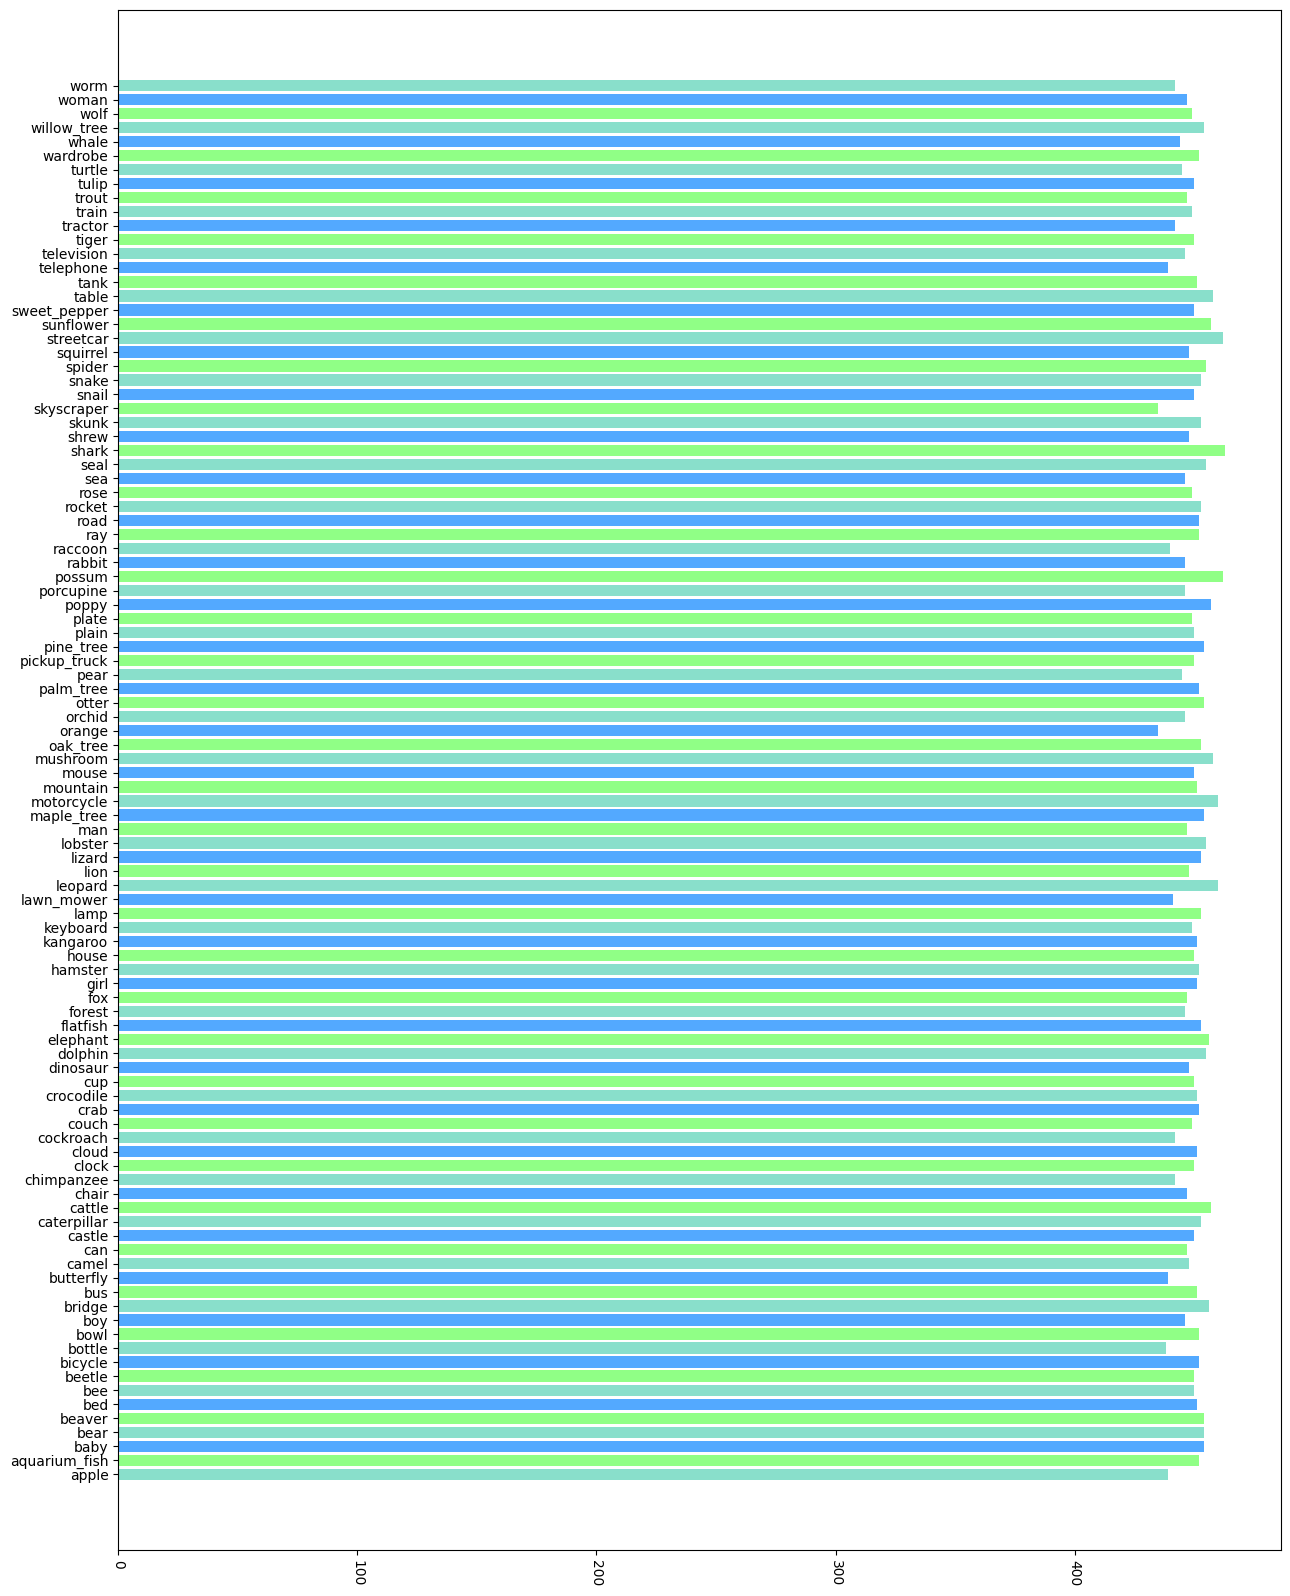

In [65]:
plt.figure(figsize=(15,20))
plt.barh(train_dict.keys(),train_dict.values(),color=["#89dfcb","#90ff86", "#53a9ff"])
plt.xticks(rotation=-90)
plt.show()

Tabular analytics of the original training dataset:

In [21]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,255,255,255,255,255,255,255,255,255,255,...,4,34,36,10,105,133,59,138,173,79
1,255,255,255,253,253,253,253,253,253,253,...,253,253,253,253,253,253,253,255,255,255
2,250,250,248,248,249,243,247,248,239,248,...,190,219,209,194,223,216,207,232,230,228
3,124,194,221,131,202,228,135,206,228,138,...,223,230,237,232,243,237,236,243,230,231
4,43,49,46,32,40,34,87,89,47,127,...,78,93,88,60,55,55,29,63,67,37


In [22]:
train_data.info()

<class 'pandas.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 3072 entries, 0 to 3071
dtypes: uint8(3072)
memory usage: 146.5 MB


In [23]:
train_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.00000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,133.625820,138.897220,135.018180,133.620260,138.775640,134.77246,134.725600,139.695920,135.522380,135.45466,...,114.882480,128.734560,127.011120,115.011220,128.250380,126.764800,114.989160,128.053120,126.797400,115.323520
std,79.200295,76.739206,82.959109,78.232566,75.777258,82.16237,77.802072,75.335076,81.902624,77.53889,...,74.878401,74.018808,71.650393,75.256193,74.594984,72.219927,75.826336,75.287087,72.893317,76.474594
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.000000,77.000000,61.000000,68.000000,78.000000,61.00000,70.000000,80.000000,62.000000,71.00000,...,53.000000,69.000000,71.000000,53.000000,68.000000,70.000000,53.000000,67.000000,69.000000,52.000000
50%,130.000000,137.000000,132.000000,131.000000,138.000000,131.00000,132.000000,139.000000,133.000000,133.00000,...,102.000000,124.000000,121.000000,102.000000,122.000000,121.000000,102.000000,122.000000,120.000000,102.000000
75%,202.000000,204.250000,214.000000,200.000000,202.000000,212.00000,201.000000,203.000000,213.000000,202.00000,...,169.000000,187.000000,179.000000,169.000000,187.000000,179.000000,170.000000,188.000000,180.000000,172.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000,255.000000,255.000000,255.000000,255.00000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


# **Summary**

<br>In this notebook, we conducted a comprehensive Exploratory Data Analysis (EDA) of the CIFAR-100 dataset to verify its suitability for Transfer Learning with Convolutional Neural Networks. Our investigation confirmed the structural integrity of the data, validating the split between the 45,000 training and 5,000 validation samples.<br>

Furthermore, we performed a rigorous statistical analysis by converting the image data into a tabular format. Finally, visual inspection of the preprocessing pipeline — specifically the side-by-side comparison of raw versus loader-processed data — demonstrated that techniques such as normalization, standardization, and horizontal flips are effectively applied. This ensures the model will receive smoothed, consistent input data, encouraging the learning of robust patterns rather than overfitting to high-frequency noise.